# Numerical operations with Numpy

## 3.1 **Broadcasting**
## 3.2 **Array shape manipulation**
##  3.3 **Sorting data**
##  **Summary**
## **Exercises**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 3.1 Broadcasting Operations

-  We just covered basic operations (add, multiple, square etc) such are element-wise but that works on arrays of same size
- **Broadcasting** comes handy when we are dealing with different shapes. This time, we'll explore a more advanced concept in numpy called broadcasting. 

- The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, *the smaller array is "broadcast" across the larger array so that they have compatible shapes*. 
- Broadcasting provides a means of **vectorizing array operations** so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are also cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.
- In this little tutorial we will provide a gentle introduction to broadcasting with numerous examples ranging from simple to involved. 
- We will also go through a few examples of when to and when not to use boradcasting.



#### This example below shows how broadcasting works

<img src="figures/numpy_broadcasting.png">

### So, lets start taking baby steps...

Here an element-wise multiplication occurs since the two arrays are of same shape

In [35]:
e = np.array([1.0, 2.0, 3.0])
f = np.array([2.0, 2.0, 2.0])
e*f

array([ 2.,  4.,  6.])

##### Hint / Try it?

What would have happened if `f = np.array([2.0, 2.0])`. would it still multiply?

In [33]:
# But if it was like this

e = np.array([1.0, 2.0, 3.0])
f = 2.0
e*f

array([ 2.,  4.,  6.])

##### What happened here

This is the most simplest example on numpy broadcasting where an array and a scalar values were combined in an operation.

so it kind of *stechted in the row direction*! The scalar **f** is stretched to become an array of with the same shape as **e** so the shapes are compatible for element-by-element multiplication.

<img src="figures/broadcast_stretch.gif">

** So what are the rules then?**
- They must either be equal / same shape
OR
- One of them must be 1, like f was above

In [46]:
# Typical broadcasting in practice
g = np.array([[ 0.0, 0.0, 0.0], [10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]])
g       

array([[  0.,   0.,   0.],
       [ 10.,  10.,  10.],
       [ 20.,  20.,  20.],
       [ 30.,  30.,  30.]])

In [47]:
h = np.array([1.0, 2.0, 3.0])
h

array([ 1.,  2.,  3.])

In [48]:
g + h

array([[  1.,   2.,   3.],
       [ 11.,  12.,  13.],
       [ 21.,  22.,  23.],
       [ 31.,  32.,  33.]])

### What happened above?

A 2-D (two-dimensional) array multiplied by 1-D (one-dimensional) array. It got stretched in the column direction so as to match the elements of the 2D array columns.
<img src="figures/broadcast_strectch2.gif">

Would the same be possible for different shapes? Does broadcasting magically understands and fixes our assumptions?

Let's take a look...



In [53]:
g = np.array([[ 0.0, 0.0, 0.0], [10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]])
i = np.array([0.0, 1.0, 2.0, 3.0])
g+i       

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

### We had a mismatch...

<img src="figures/broadcast_strectch3.gif">

Explanation: When the trainling dimensions of the arrays are different as you saw above, then broadcasting will fail making it impossible to align the values in the rows of the first array with the elements of the second array for an **element-by-element** addition or multiplication.

### Also, is there a way to do this in one line of code

Tip: look up more into np.tile and np.arange

In [60]:
a = np.tile(np.arange(0, 40, 10), (3, 1))
a = a.T # transpose this
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [57]:
b = np.array([0, 1, 2])
b

array([0, 1, 2])

##### Now, we add these two

In [58]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

##### So you see that broadcasting was applied magically...

Ask yourself, why couldn't we add original `a` and `b` ?

Note, original a was:
```python
array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])
```

In [19]:
c = np.ones((5, 6))
c

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

##### Let's assign an array of dimension 0 to an array of dimension 1

In [20]:
c[0] = 2
c

array([[ 2.,  2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [21]:
d = np.arange(0, 30, 10)
d

array([ 0, 10, 20])

In [22]:
d.shape

(3,)

In [23]:
d = d[:, np.newaxis] # Here we add a new axis and make it a 2D array
d.shape

(3, 1)

In [24]:
a + d

array([[ 0, 10, 20],
       [10, 20, 30],
       [20, 30, 40]])

#### Another example on broadcasting

Let’s construct an array of distances (in miles) between cities of Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.

In [25]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

#### Another example

A lot of grid-based or network-based problems can also use broadcasting. For instance, if we want to compute the distance from the origin of points on a 10x10 grid, we can do

In [26]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x**2 + y**2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

<function matplotlib.pyplot.colorbar>

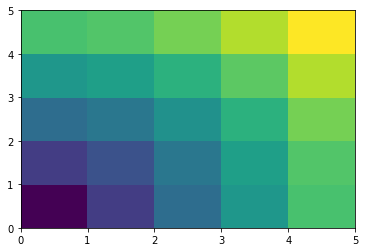

In [30]:
plt.pcolor(distance)
plt.colorbar

## 3.2 Array Shape Manipulation

## 3.3 Sorting Data